In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/chain-of-thought-research-paper/chain_of_thought_final.csv")

In [3]:
df.head()

,venue_version,review_id,review_number,review_text,confidence_score,rating,section_coverage_1,section_coverage_2,section_coverage_3,section_coverage_4,...,aspect_coverage_4_polarity,Decision_Llama,CoT_Reasoning_Llama,Decision_GPT,CoT_Reasoning_GPT,Decision_Mistral,CoT_Reasoning_Mistral,Decision_Gemma,CoT_Reasoning_Gemma,Human_reviewer
0,ICLR2018,BJDH5M-AW-,R1,. . . Main comments:. - The idea of building 3...,4,5,PDI,NaN,NaN,NaN,...,NaN,Trivial,**Chain of Thought (CoT) Reasoning:**\n\n1. Th...,Exhaustive,Chain of Thought (CoT) Reasoning:\n\n1. The re...,Trivial,Chain of Thought (CoT):\n\n1. The review menti...,Trivial,Let's break down the review's coverage based o...,Trivial
1,ICLR2018,BJDH5M-AW-,R1,"However, the paper is incomplete, with a very ...",4,5,RWK,BIB,NaN,NaN,...,NaN,Trivial,**Chain of Thought (CoT) Reasoning:**\n\n1. Th...,Exhaustive,Chain of Thought (CoT) Reasoning:\n\n1. The re...,Trivial,Chain of Thought (CoT):\n\n1. The review menti...,Trivial,Let's break down the review's coverage based o...,Trivial
2,ICLR2018,BJDH5M-AW-,R1,. See for instance Cisse et al. Houdini: fooli...,4,5,RWK,BIB,NaN,NaN,...,NaN,Trivial,**Chain of Thought (CoT) Reasoning:**\n\n1. Th...,Exhaustive,Chain of Thought (CoT) Reasoning:\n\n1. The re...,Trivial,Chain of Thought (CoT):\n\n1. The review menti...,Trivial,Let's break down the review's coverage based o...,Trivial
3,ICLR2018,BJDH5M-AW-,R1,. - The presentation of the results is not ver...,4,5,RES,NaN,NaN,NaN,...,NaN,Trivial,**Chain of Thought (CoT) Reasoning:**\n\n1. Th...,Exhaustive,Chain of Thought (CoT) Reasoning:\n\n1. The re...,Trivial,Chain of Thought (CoT):\n\n1. The review menti...,Trivial,Let's break down the review's coverage based o...,Trivial
4,ICLR2018,BJDH5M-AW-,R1,See specific comments below.. - It would be ni...,4,5,RES,NaN,NaN,NaN,...,NaN,Trivial,**Chain of Thought (CoT) Reasoning:**\n\n1. Th...,Exhaustive,Chain of Thought (CoT) Reasoning:\n\n1. The re...,Trivial,Chain of Thought (CoT):\n\n1. The review menti...,Trivial,Let's break down the review's coverage based o...,Trivial


In [4]:
df.columns

Index(['venue_version', 'review_id', 'review_number', 'review_text',
       'confidence_score', 'rating', 'section_coverage_1',
       'section_coverage_2', 'section_coverage_3', 'section_coverage_4',
       'section_coverage_5', 'section_coverage_6', 'aspect_coverage_1',
       'aspect_coverage_2', 'aspect_coverage_3', 'aspect_coverage_4',
       'section_coverage_1_polarity', 'section_coverage_2_polarity',
       'section_coverage_3_polarity', 'section_coverage_4_polarity',
       'section_coverage_5_polarity', 'section_coverage_6_polarity',
       'aspect_coverage_1_polarity', 'aspect_coverage_2_polarity',
       'aspect_coverage_3_polarity', 'aspect_coverage_4_polarity',
       'Decision_Llama', 'CoT_Reasoning_Llama', 'Decision_GPT',
       'CoT_Reasoning_GPT', 'Decision_Mistral', 'CoT_Reasoning_Mistral',
       'Decision_Gemma', 'CoT_Reasoning_Gemma', 'Human_reviewer'],
      dtype='object')

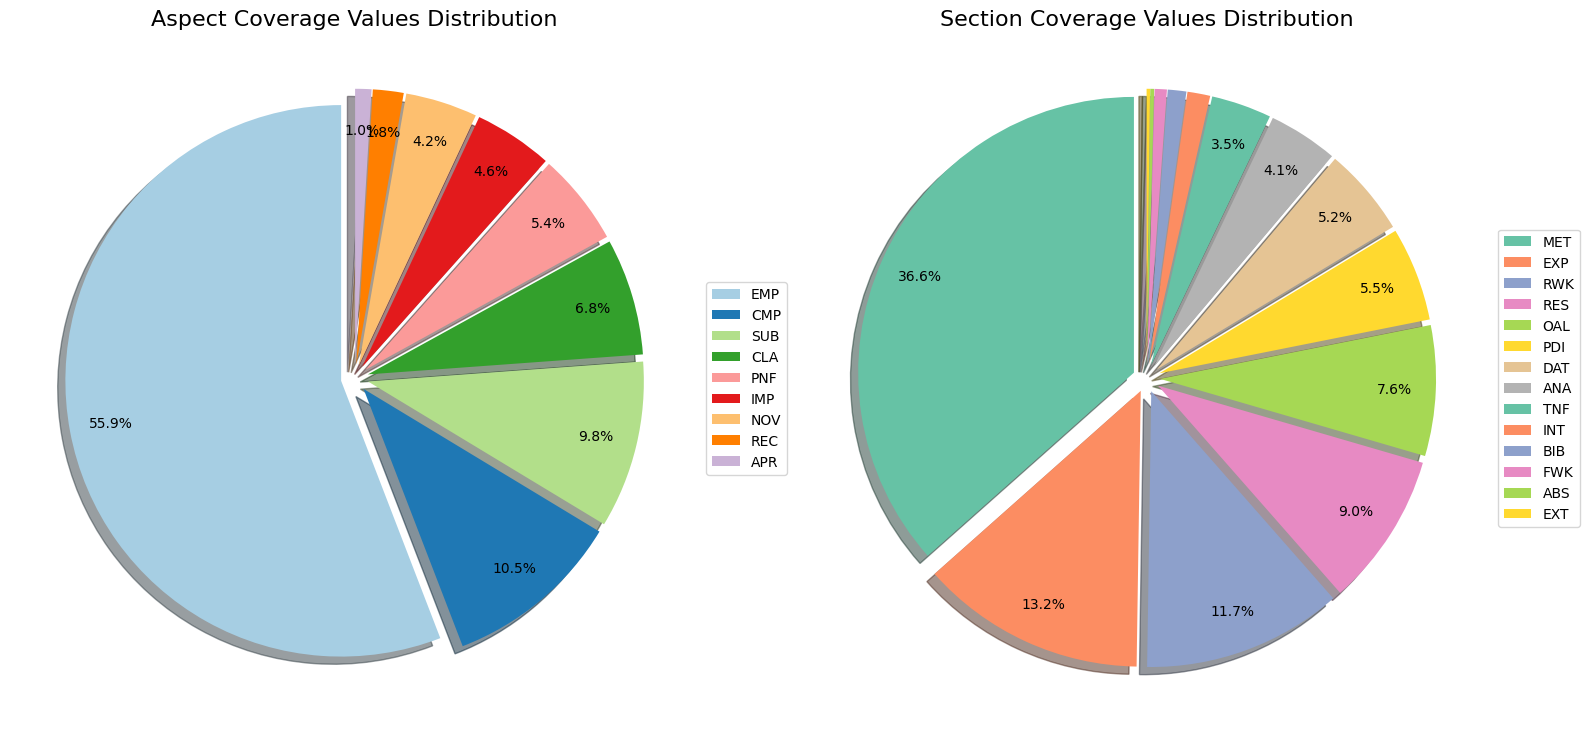

In [ ]:
aspect_columns = ['aspect_coverage_1', 'aspect_coverage_2', 'aspect_coverage_3', 'aspect_coverage_4']
section_columns = ['section_coverage_1', 'section_coverage_2', 'section_coverage_3', 'section_coverage_4', 'section_coverage_5', 'section_coverage_6']

aspect_coverage_values = df[aspect_columns].stack().value_counts()
section_coverage_values = df[section_columns].stack().value_counts()

explode_aspect = [0.05] * len(aspect_coverage_values)
explode_section = [0.05] * len(section_coverage_values)

def get_autopct(values):
    def autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%'.format(pct) if pct > 2 else ''
    return autopct

fig, axs = plt.subplots(1, 2, figsize=(16, 8))

axs[0].pie(aspect_coverage_values, labels=None, autopct='%1.1f%%', 
           startangle=90, explode=explode_aspect, pctdistance=0.85, 
           shadow=True, colors=plt.cm.Paired.colors)
axs[0].set_title('Aspect Coverage Values Distribution', fontsize=16)

axs[0].legend(aspect_coverage_values.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

axs[1].pie(section_coverage_values, labels=None, autopct=get_autopct(section_coverage_values), 
           startangle=90, explode=explode_section, pctdistance=0.85, 
           shadow=True, colors=plt.cm.Set2.colors)
axs[1].set_title('Section Coverage Values Distribution', fontsize=16)

axs[1].legend(section_coverage_values.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.subplots_adjust(left=0.1, right=0.75)
plt.tight_layout()
plt.show()

In [ ]:
global_section_coverage_df = pd.DataFrame()
global_aspect_coverage_df = pd.DataFrame()

def create_viz_coverage(column_name):
    global global_section_coverage_df, global_aspect_coverage_df

    
    exhaustive_df = df[df[column_name] == 'Exhaustive']
    trivial_df = df[df[column_name] == 'Trivial']

    
    exhaustive_aspect_values = exhaustive_df[aspect_columns].stack().value_counts()
    exhaustive_section_values = exhaustive_df[section_columns].stack().value_counts()

    trivial_aspect_values = trivial_df[aspect_columns].stack().value_counts()
    trivial_section_values = trivial_df[section_columns].stack().value_counts()

    
    total_aspect_values = exhaustive_aspect_values.add(trivial_aspect_values, fill_value=0)
    total_section_values = exhaustive_section_values.add(trivial_section_values, fill_value=0)

    
    explode_exhaustive_aspect = [0.05] * len(exhaustive_aspect_values)
    explode_exhaustive_section = [0.05] * len(exhaustive_section_values)
    explode_trivial_aspect = [0.05] * len(trivial_aspect_values)
    explode_trivial_section = [0.05] * len(trivial_section_values)

    def get_autopct(values):
        def autopct(pct):
            total = sum(values)
            return '{:.1f}%'.format(pct) if pct > 2 else ''
        return autopct

    
    fig, axs = plt.subplots(2, 2, figsize=(16, 16))

    
    axs[0, 0].pie(exhaustive_aspect_values, labels=None, autopct='%1.1f%%',
                  startangle=90, explode=explode_exhaustive_aspect, pctdistance=0.85,
                  shadow=True, colors=plt.cm.Paired.colors)
    axs[0, 0].set_title('Exhaustive: Aspect Coverage Distribution', fontsize=16)
    axs[0, 0].legend(exhaustive_aspect_values.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    axs[0, 1].pie(exhaustive_section_values, labels=None, autopct=get_autopct(exhaustive_section_values),
                  startangle=90, explode=explode_exhaustive_section, pctdistance=0.85,
                  shadow=True, colors=plt.cm.Set2.colors)
    axs[0, 1].set_title('Exhaustive: Section Coverage Distribution', fontsize=16)
    axs[0, 1].legend(exhaustive_section_values.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    axs[1, 0].pie(trivial_aspect_values, labels=None, autopct='%1.1f%%',
                  startangle=90, explode=explode_trivial_aspect, pctdistance=0.85,
                  shadow=True, colors=plt.cm.Paired.colors)
    axs[1, 0].set_title('Trivial: Aspect Coverage Distribution', fontsize=16)
    axs[1, 0].legend(trivial_aspect_values.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    axs[1, 1].pie(trivial_section_values, labels=None, autopct=get_autopct(trivial_section_values),
                  startangle=90, explode=explode_trivial_section, pctdistance=0.85,
                  shadow=True, colors=plt.cm.Set2.colors)
    axs[1, 1].set_title('Trivial: Section Coverage Distribution', fontsize=16)
    axs[1, 1].legend(trivial_section_values.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    plt.subplots_adjust(left=0.1, right=0.75)
    plt.tight_layout()

    
    section_coverage_data = {
        'Exhaustive': ', '.join([f"{key} {val}" for key, val in exhaustive_section_values.items()]),
        'Trivial': ', '.join([f"{key} {val}" for key, val in trivial_section_values.items()]),
        'Total': total_section_values.sum()
    }

    aspect_coverage_data = {
        'Exhaustive': ', '.join([f"{key} {val}" for key, val in exhaustive_aspect_values.items()]),
        'Trivial': ', '.join([f"{key} {val}" for key, val in trivial_aspect_values.items()]),
        'Total': total_aspect_values.sum()
    }

    
    global_section_coverage_df[column_name] = pd.Series(section_coverage_data)
    global_aspect_coverage_df[column_name] = pd.Series(aspect_coverage_data)

    
    if 'Coverage Type' not in global_section_coverage_df.columns:
        global_section_coverage_df['Coverage Type'] = section_coverage_data.keys()
    if 'Coverage Type' not in global_aspect_coverage_df.columns:
        global_aspect_coverage_df['Coverage Type'] = aspect_coverage_data.keys()

    
    cols = ['Coverage Type'] + [col for col in global_section_coverage_df.columns if col != 'Coverage Type']
    global_section_coverage_df = global_section_coverage_df[cols]
    global_aspect_coverage_df = global_aspect_coverage_df[cols]

    plt.show()

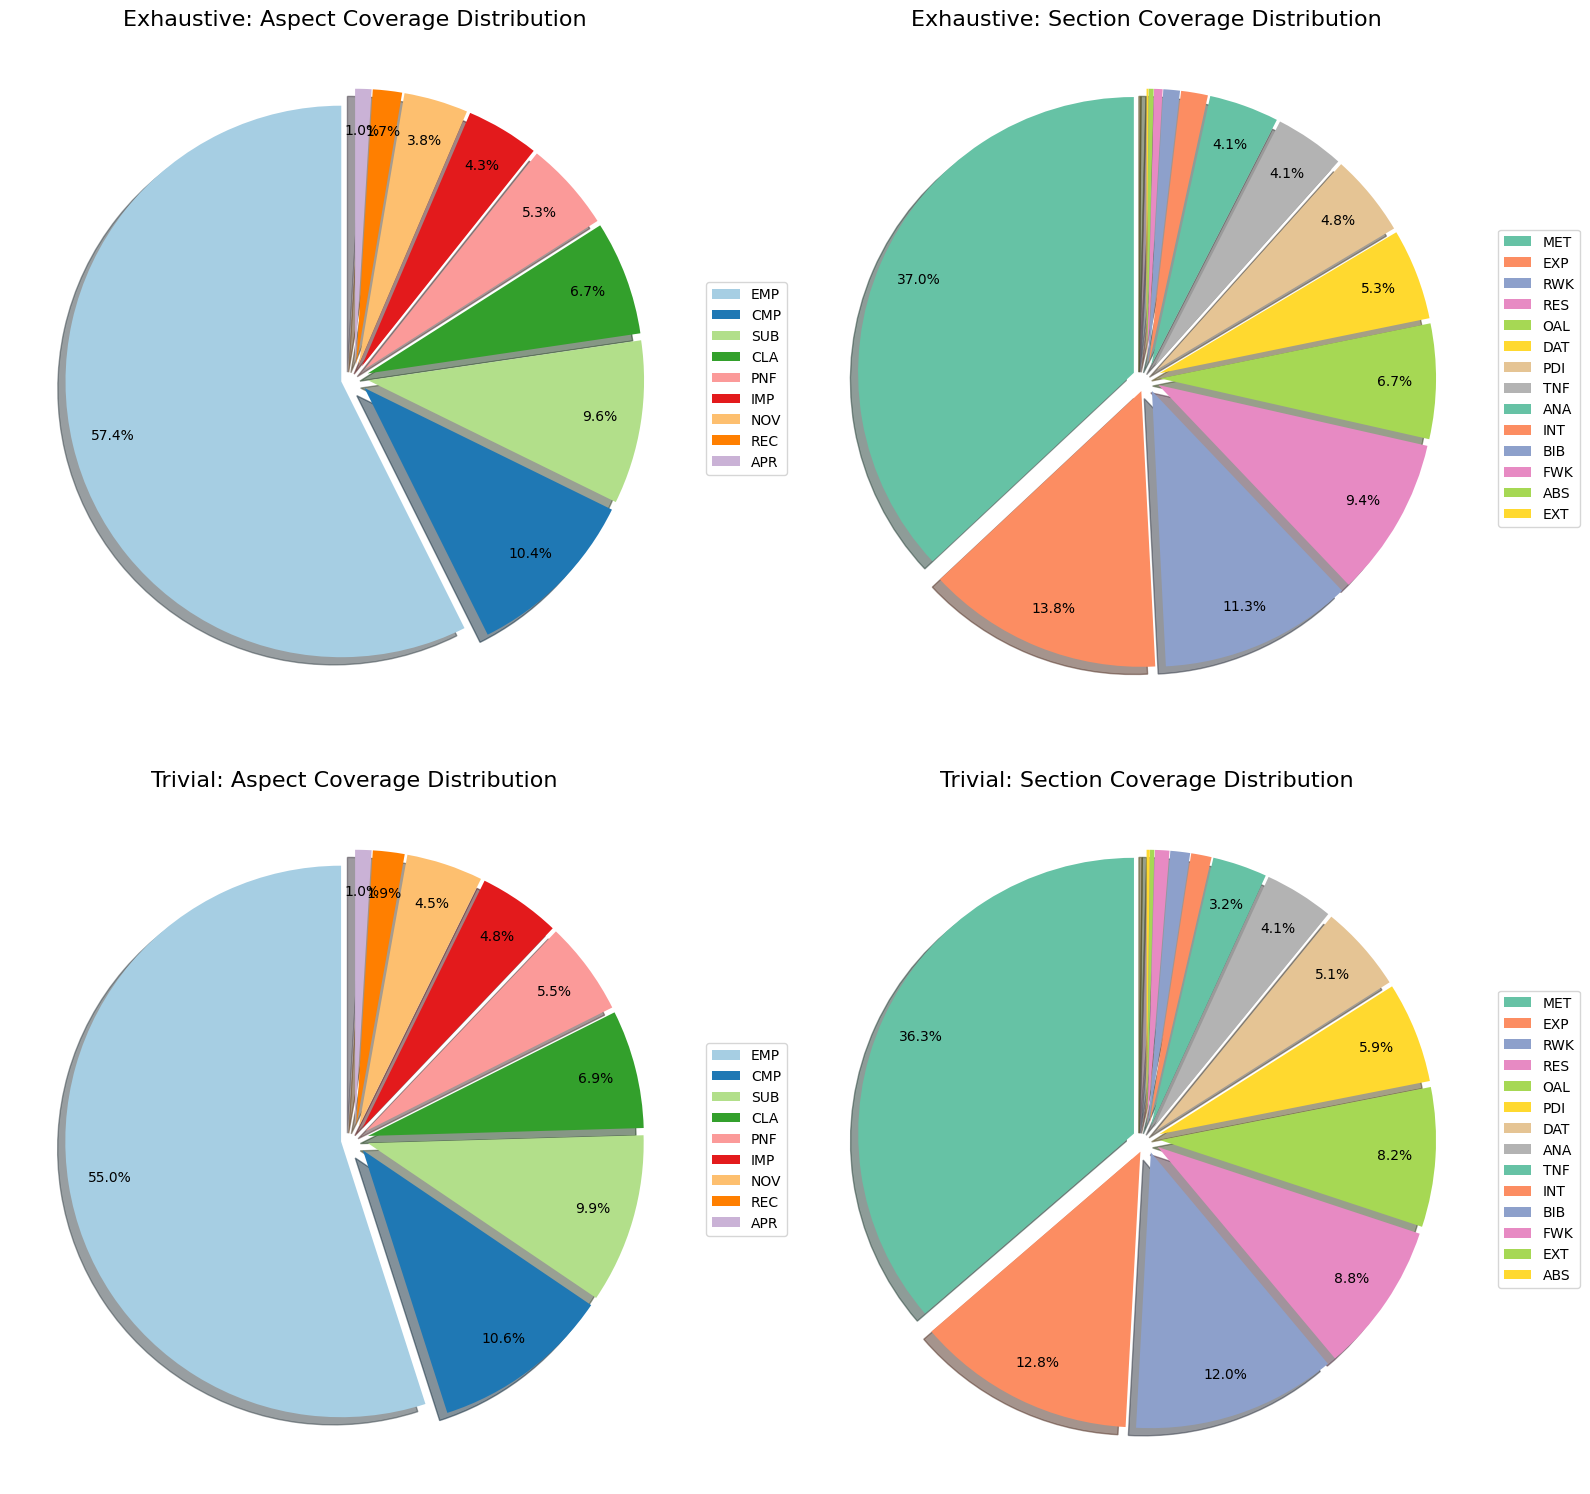

In [9]:
create_viz_coverage("Human_reviewer")

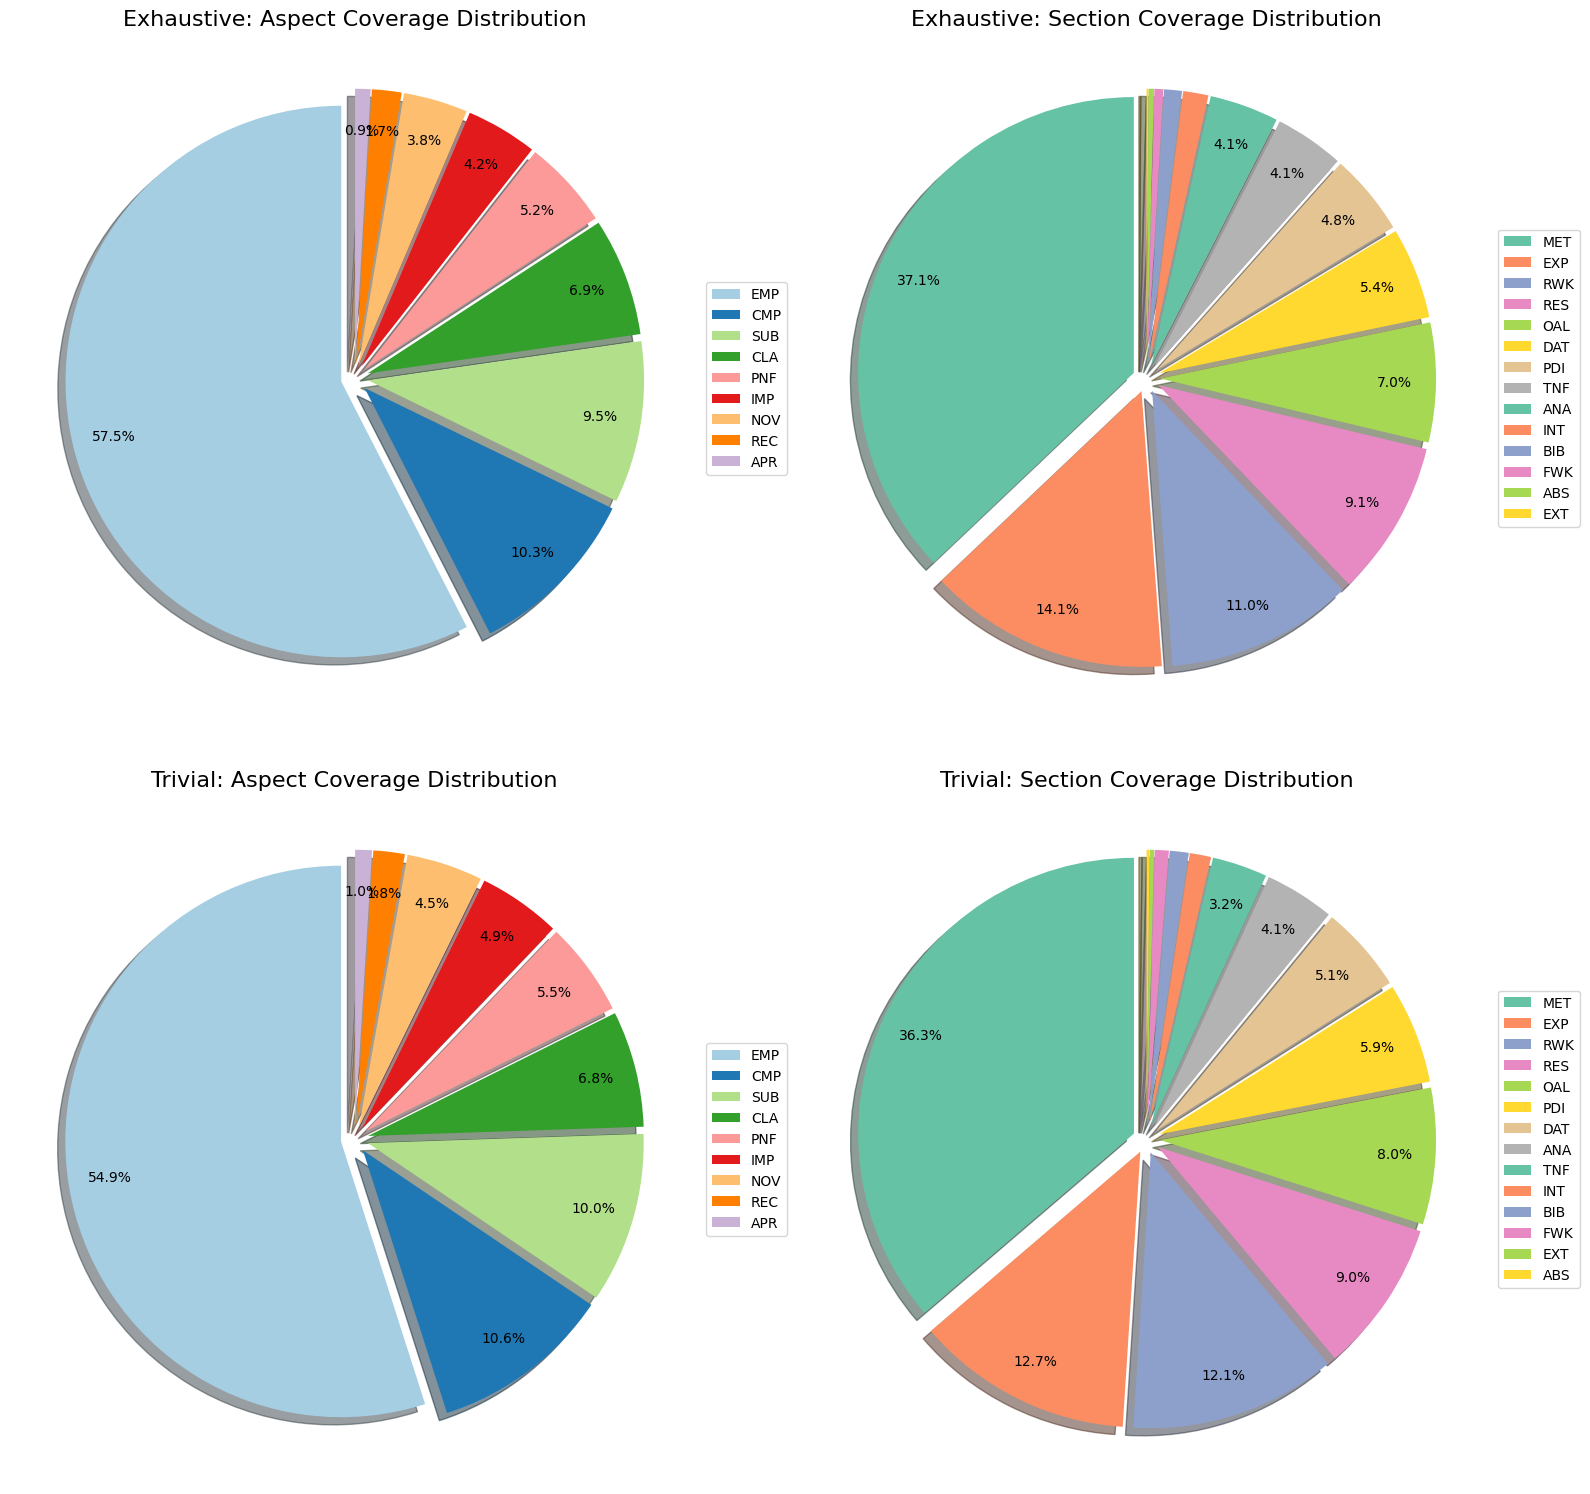

In [10]:
create_viz_coverage("Decision_Llama")

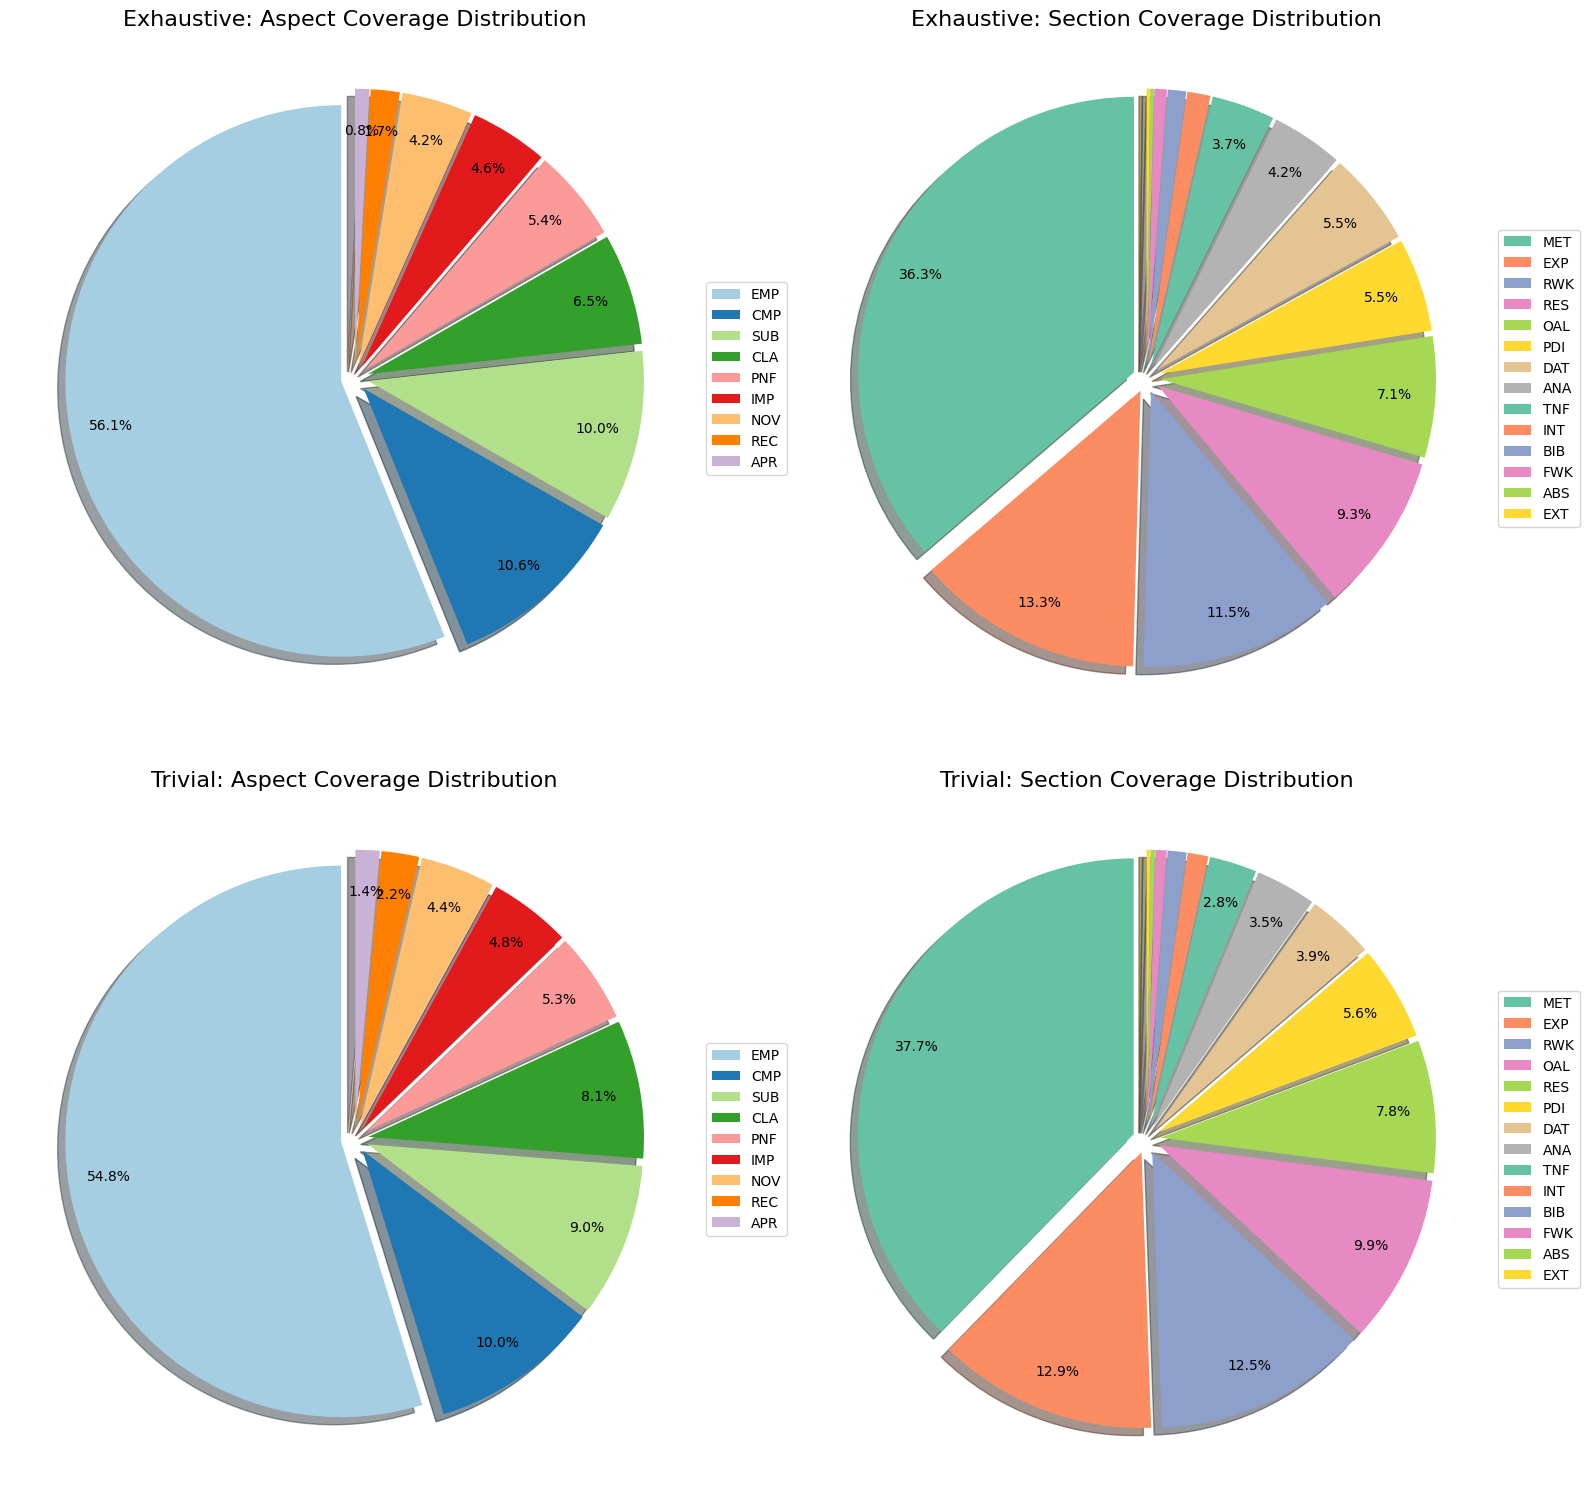

In [11]:
create_viz_coverage("Decision_GPT")

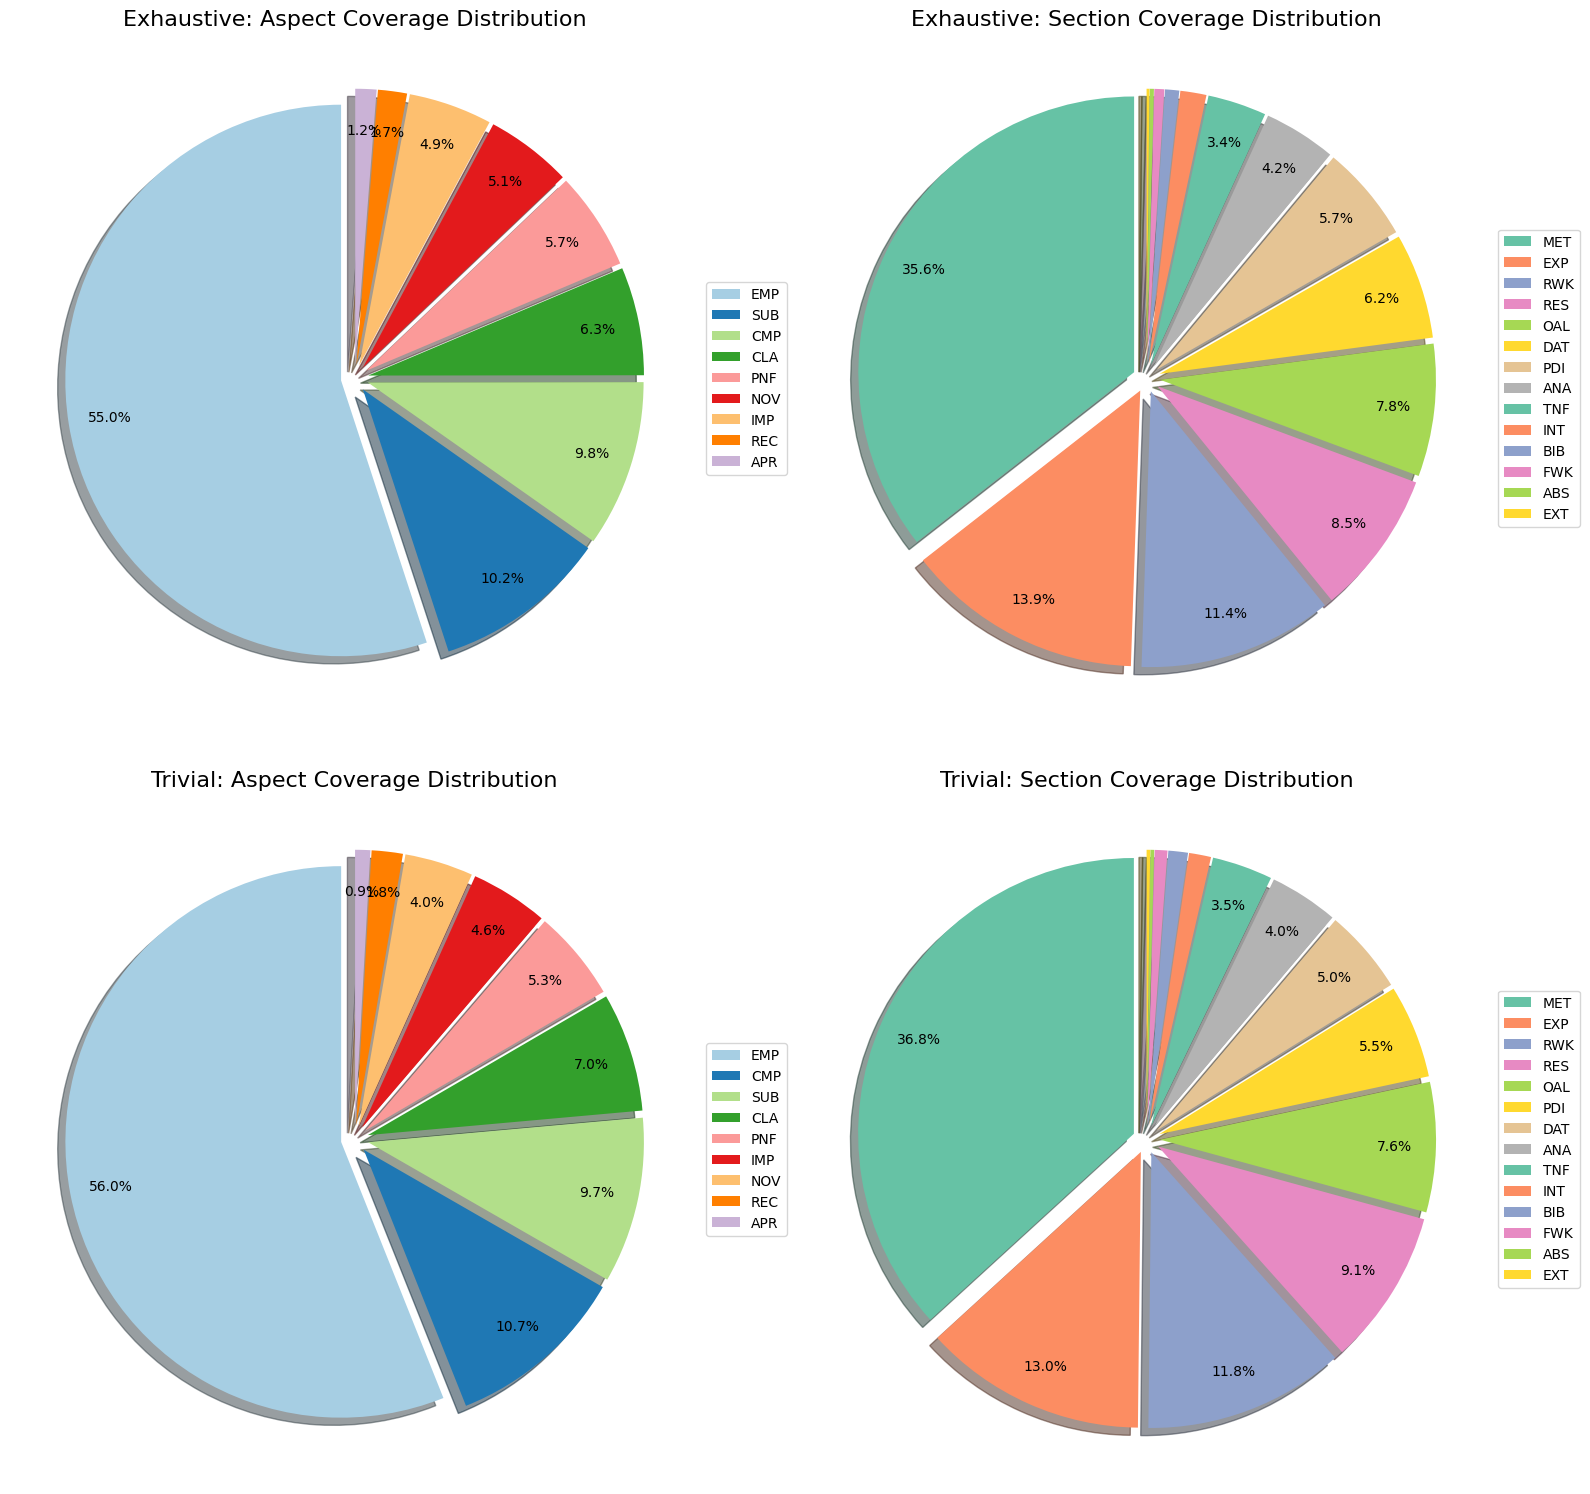

In [12]:
create_viz_coverage("Decision_Mistral")

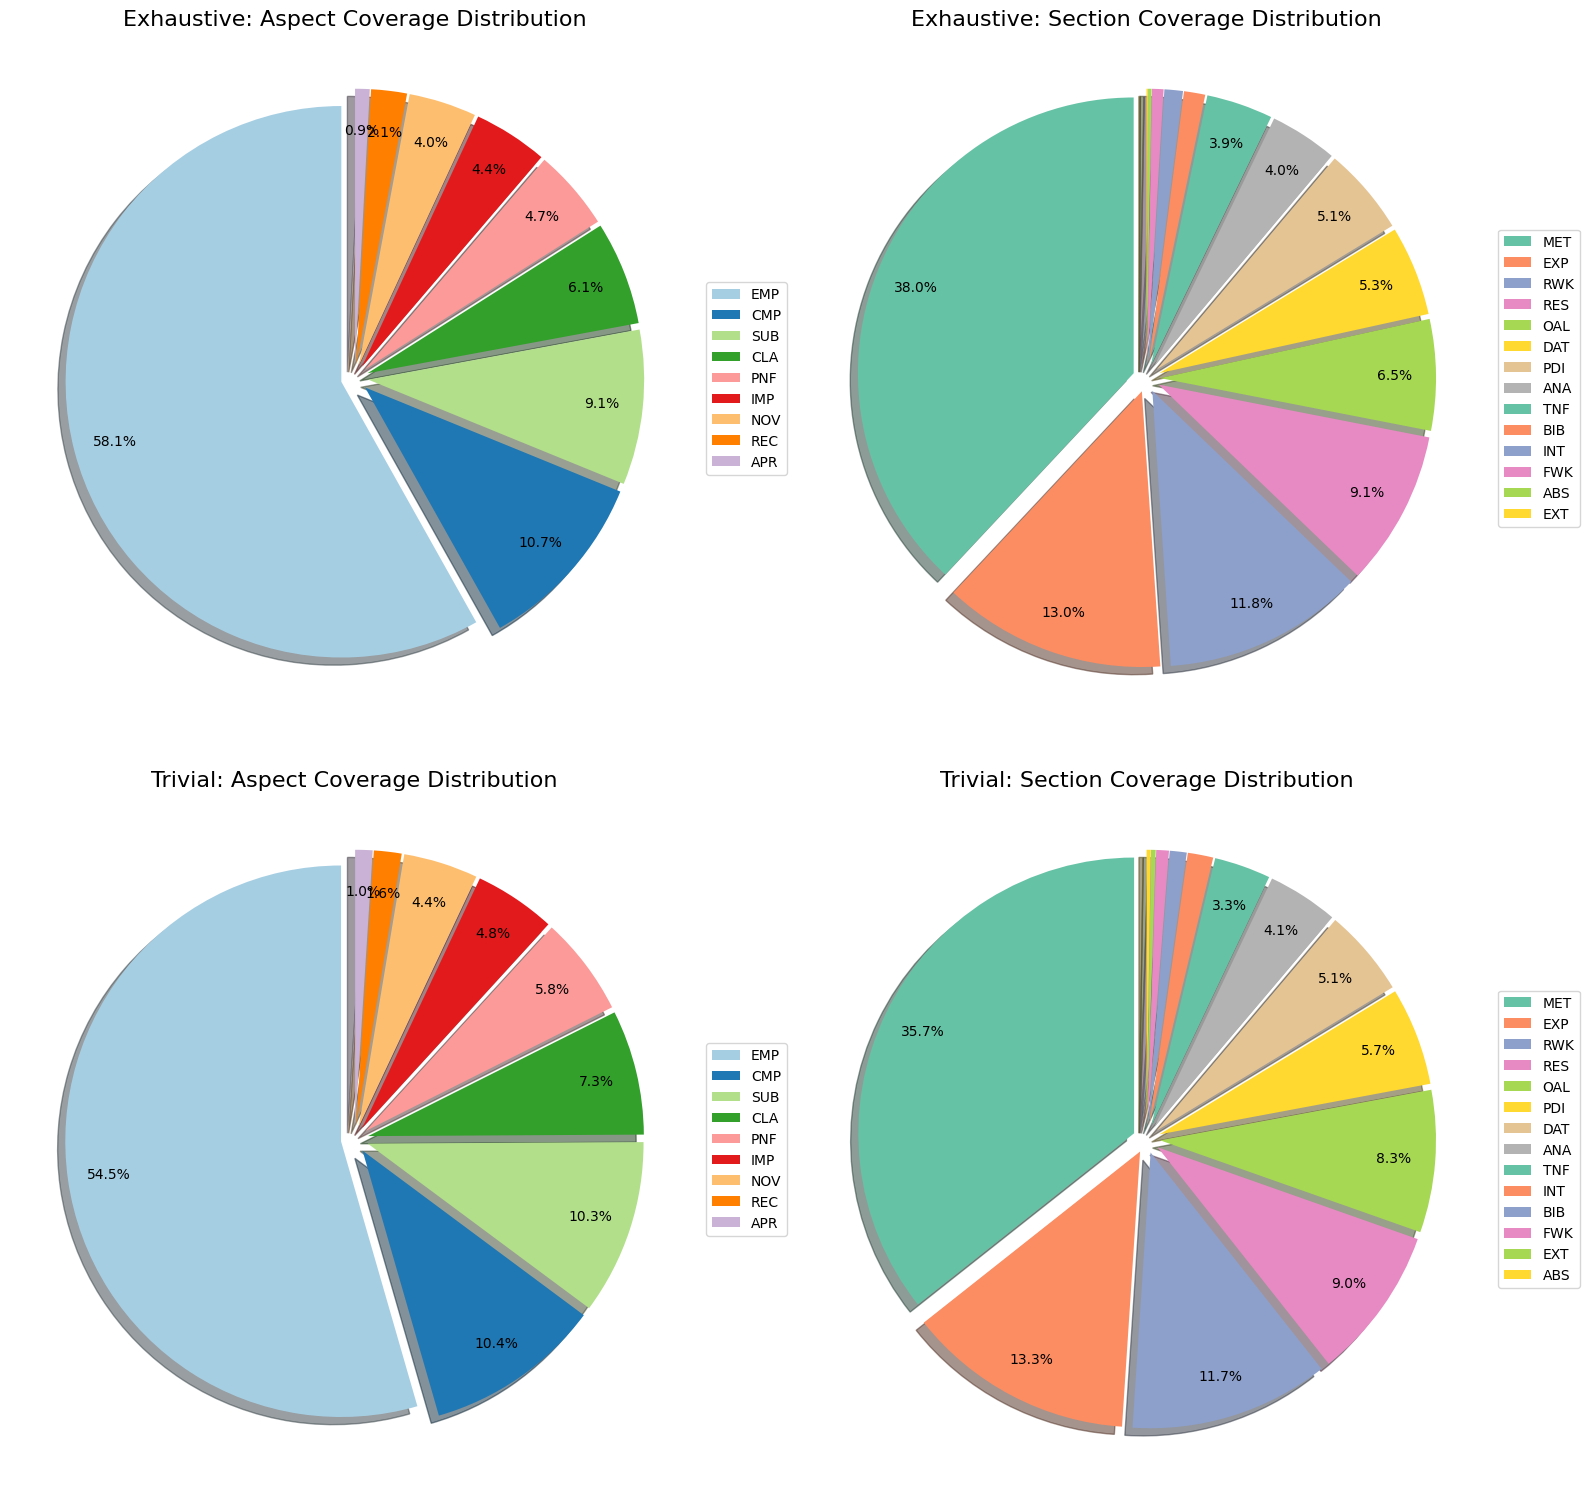

In [13]:
create_viz_coverage("Decision_Gemma")

In [ ]:
global_aspect_coverage_df.to_csv("/kaggle/working/qualitative-analysis-aspect.csv")

In [ ]:
global_section_coverage_df.to_csv("/kaggle/working/qualitative-analysis-section.csv")